In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
df = pd.read_txt("dData/Customers.txt")


<>:1: SyntaxWarning: "\g" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\g"? A raw string is also an option.
<>:1: SyntaxWarning: "\g" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\g"? A raw string is also an option.
C:\Users\marco\AppData\Local\Temp\ipykernel_19664\388960887.py:1: SyntaxWarning: "\g" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\g"? A raw string is also an option.
  df = pd.read_csv("data\genz_slang_usage_2020_2025.csv")


In [ ]:
df.shape

(535396, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535396 entries, 0 to 535395
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   record_id             535396 non-null  int64  
 1   timestamp             535396 non-null  object 
 2   slang_term            535396 non-null  object 
 3   term_category         535396 non-null  object 
 4   term_meaning          535396 non-null  object 
 5   origin_platform       535396 non-null  object 
 6   usage_platform        535396 non-null  object 
 7   region                535396 non-null  object 
 8   user_id               535396 non-null  object 
 9   user_age_group        535396 non-null  object 
 10  usage_context         535396 non-null  object 
 11  lifecycle_phase       535396 non-null  object 
 12  intensity_score       535396 non-null  float64
 13  sentiment             535396 non-null  object 
 14  sentiment_score       535396 non-null  float64
 15  

<Axes: xlabel='slang_term'>

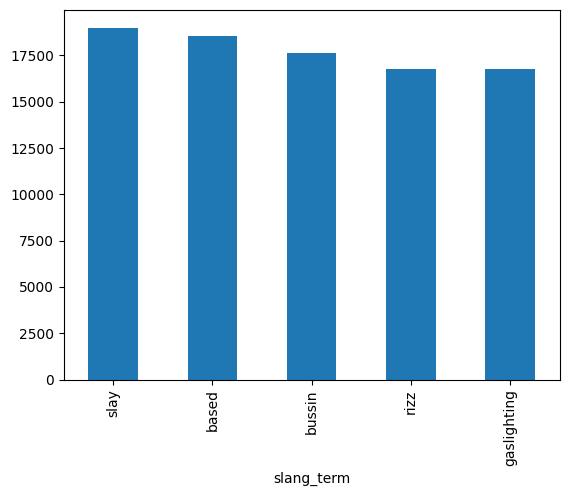

In [90]:
df["slang_term"].value_counts().head().plot(kind="bar")

In [ ]:
df.head()

,record_id,timestamp,slang_term,term_category,term_meaning,origin_platform,usage_platform,region,user_id,user_age_group,...,intensity_score,sentiment,sentiment_score,ironic_usage,likes,shares,comments,virality_score,is_viral,days_since_emergence
0,0,2020-01-01 01:23:17,simp,insult,someone overly devoted to another person,Reddit,Twitter,California,user_019223,25-30,...,0.603,negative,-0.740,False,18,2,5,0.004,False,153
1,1,2020-01-01 03:21:59,simp,insult,someone overly devoted to another person,Reddit,Twitter,Texas,user_497341,13-17,...,0.603,negative,-0.978,False,24,1,2,0.004,False,153
2,2,2020-01-01 05:31:01,vibe check,social,checking someone's mood/energy,TikTok,TikTok,Canada,user_323563,31-40,...,0.552,positive,0.384,False,121,1,0,0.013,False,92
3,3,2020-01-01 05:35:30,no cap,emphasis,"no lie, for real",Twitter,Twitter,Arizona,user_244857,18-24,...,0.551,neutral,0.167,False,47,2,1,0.006,False,214
4,4,2020-01-01 06:39:57,no cap,emphasis,"no lie, for real",Twitter,Instagram,Arizona,user_421848,13-17,...,0.551,positive,0.874,False,18,0,14,0.006,False,214


In [ ]:
df.isna().sum()

record_id               0
timestamp               0
slang_term              0
term_category           0
term_meaning            0
origin_platform         0
usage_platform          0
region                  0
user_id                 0
user_age_group          0
usage_context           0
lifecycle_phase         0
intensity_score         0
sentiment               0
sentiment_score         0
ironic_usage            0
likes                   0
shares                  0
comments                0
virality_score          0
is_viral                0
days_since_emergence    0
dtype: int64

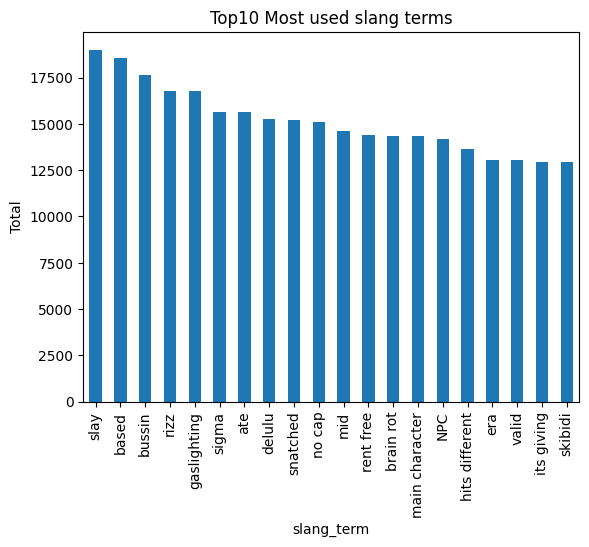

In [ ]:
df["slang_term"].value_counts().head(20).plot(kind="bar")

plt.title("Top10 Most used slang terms")
plt.ylabel("Total")
plt.show()




<Axes: xlabel='slang_term'>

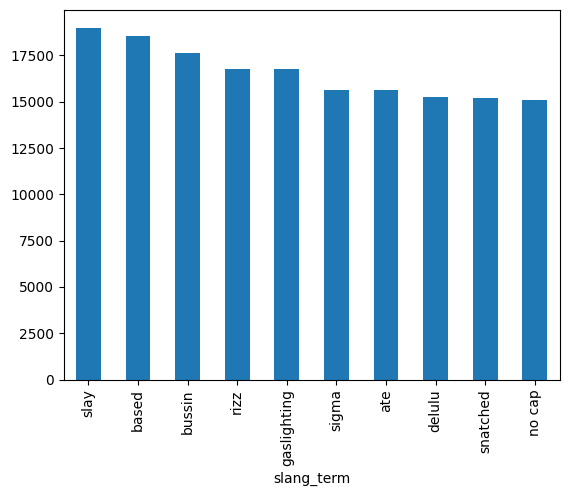

In [79]:
df["slang_term"].value_counts().head(10).plot(kind="bar")

Text(0, 0.5, 'Total')

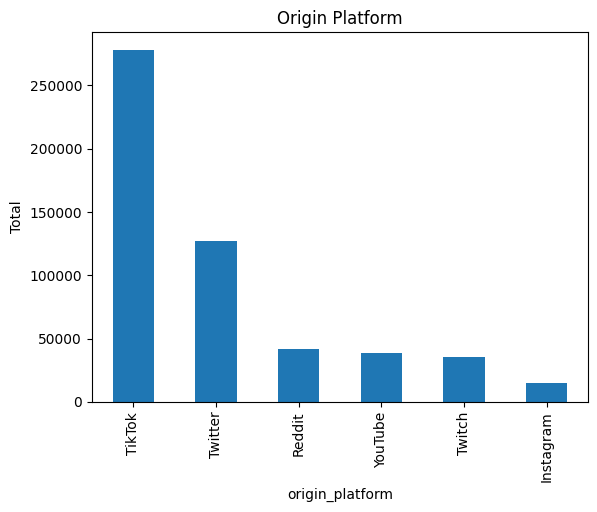

In [18]:
df["origin_platform"].value_counts().plot(kind="bar")
plt.title("Origin Platform")
plt.ylabel("Total")

Text(0, 0.5, 'Total')

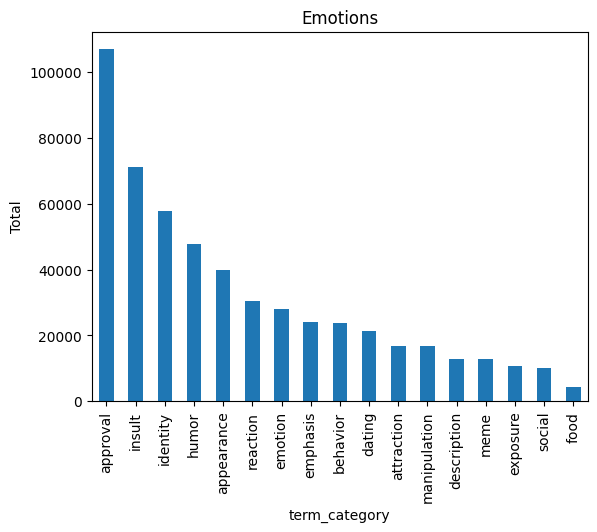

In [20]:
df["term_category"].value_counts().plot(kind="bar")
plt.title("Emotions")
plt.ylabel("Total")

Text(0, 0.5, 'Total')

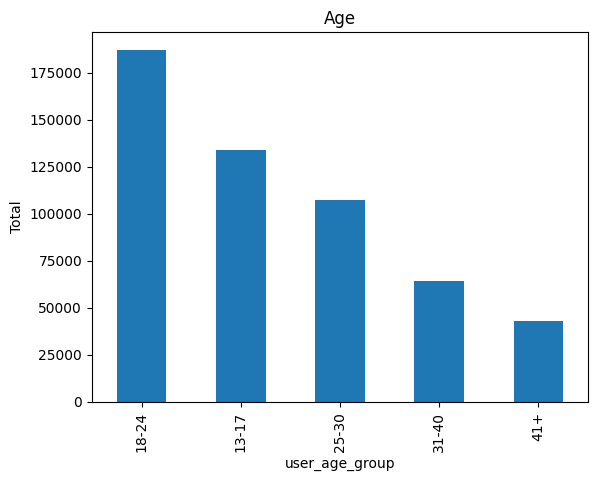

In [21]:
df["user_age_group"].value_counts().plot(kind="bar")
plt.title("Age")
plt.ylabel("Total")

In [91]:
display(df)

,record_id,timestamp,slang_term,term_category,term_meaning,origin_platform,usage_platform,region,user_id,user_age_group,...,sentiment,sentiment_score,ironic_usage,likes,shares,comments,virality_score,is_viral,days_since_emergence,Hour
0,0,2020-01-01 01:23:17,simp,insult,someone overly devoted to another person,Reddit,Twitter,California,user_019223,25-30,...,negative,-0.740,False,18,2,5,0.004,False,153,1
1,1,2020-01-01 03:21:59,simp,insult,someone overly devoted to another person,Reddit,Twitter,Texas,user_497341,13-17,...,negative,-0.978,False,24,1,2,0.004,False,153,3
2,2,2020-01-01 05:31:01,vibe check,social,checking someone's mood/energy,TikTok,TikTok,Canada,user_323563,31-40,...,positive,0.384,False,121,1,0,0.013,False,92,5
3,3,2020-01-01 05:35:30,no cap,emphasis,"no lie, for real",Twitter,Twitter,Arizona,user_244857,18-24,...,neutral,0.167,False,47,2,1,0.006,False,214,5
4,4,2020-01-01 06:39:57,no cap,emphasis,"no lie, for real",Twitter,Instagram,Arizona,user_421848,13-17,...,positive,0.874,False,18,0,14,0.006,False,214,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535391,535391,2025-12-31 23:26:53,cooked,reaction,"done for, ruined",TikTok,Reddit,Georgia,user_032892,18-24,...,neutral,-0.265,True,16,4,4,0.005,False,699,23
535392,535392,2025-12-31 23:29:56,looksmaxxing,appearance,maximizing physical appearance,YouTube,YouTube,India,user_172355,31-40,...,positive,0.893,False,1,0,0,0.000,False,639,23
535393,535393,2025-12-31 23:37:40,aura,identity,personal energy/presence points,TikTok,TikTok,UK,user_208644,13-17,...,neutral,-0.114,False,35,14,0,0.011,False,578,23
535394,535394,2025-12-31 23:42:39,cooked,reaction,"done for, ruined",TikTok,TikTok,California,user_114038,18-24,...,neutral,0.161,True,175,4,19,0.025,False,699,23


In [92]:
df

,record_id,timestamp,slang_term,term_category,term_meaning,origin_platform,usage_platform,region,user_id,user_age_group,...,sentiment,sentiment_score,ironic_usage,likes,shares,comments,virality_score,is_viral,days_since_emergence,Hour
0,0,2020-01-01 01:23:17,simp,insult,someone overly devoted to another person,Reddit,Twitter,California,user_019223,25-30,...,negative,-0.740,False,18,2,5,0.004,False,153,1
1,1,2020-01-01 03:21:59,simp,insult,someone overly devoted to another person,Reddit,Twitter,Texas,user_497341,13-17,...,negative,-0.978,False,24,1,2,0.004,False,153,3
2,2,2020-01-01 05:31:01,vibe check,social,checking someone's mood/energy,TikTok,TikTok,Canada,user_323563,31-40,...,positive,0.384,False,121,1,0,0.013,False,92,5
3,3,2020-01-01 05:35:30,no cap,emphasis,"no lie, for real",Twitter,Twitter,Arizona,user_244857,18-24,...,neutral,0.167,False,47,2,1,0.006,False,214,5
4,4,2020-01-01 06:39:57,no cap,emphasis,"no lie, for real",Twitter,Instagram,Arizona,user_421848,13-17,...,positive,0.874,False,18,0,14,0.006,False,214,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535391,535391,2025-12-31 23:26:53,cooked,reaction,"done for, ruined",TikTok,Reddit,Georgia,user_032892,18-24,...,neutral,-0.265,True,16,4,4,0.005,False,699,23
535392,535392,2025-12-31 23:29:56,looksmaxxing,appearance,maximizing physical appearance,YouTube,YouTube,India,user_172355,31-40,...,positive,0.893,False,1,0,0,0.000,False,639,23
535393,535393,2025-12-31 23:37:40,aura,identity,personal energy/presence points,TikTok,TikTok,UK,user_208644,13-17,...,neutral,-0.114,False,35,14,0,0.011,False,578,23
535394,535394,2025-12-31 23:42:39,cooked,reaction,"done for, ruined",TikTok,TikTok,California,user_114038,18-24,...,neutral,0.161,True,175,4,19,0.025,False,699,23


<Axes: xlabel='Hour'>

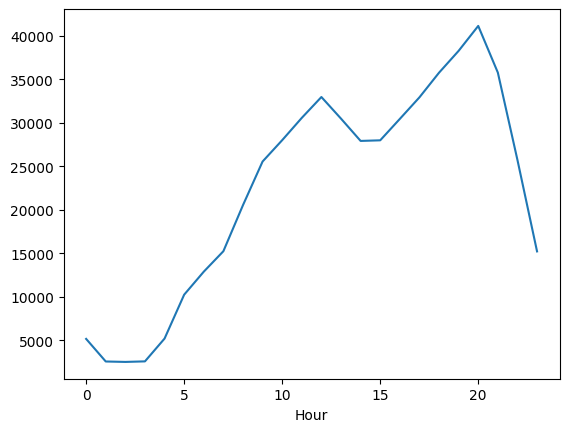

In [30]:
df["timestamp"] = pd.to_datetime(df["timestamp"])
df["Hour"] = df["timestamp"].dt.hour
df["Hour"].value_counts().sort_index().plot(kind="line")

In [ ]:
df["user_age_group"].value_counts().plot(kind="bar")
plt.title("Age")
plt.ylabel("Total")

In [10]:
df.describe(include="all")

,record_id,timestamp,slang_term,term_category,term_meaning,origin_platform,usage_platform,region,user_id,user_age_group,...,intensity_score,sentiment,sentiment_score,ironic_usage,likes,shares,comments,virality_score,is_viral,days_since_emergence
count,535396.000000,535396,535396,535396,535396,535396,535396,535396,535396,535396,...,535396.000000,535396,535396.000000,535396,535396.000000,535396.000000,535396.000000,535396.000000,535396,535396.000000
unique,NaN,534320,46,17,46,6,7,22,328571,5,...,NaN,3,NaN,2,NaN,NaN,NaN,NaN,2,NaN
top,NaN,2024-01-22 07:26:08,slay,approval,doing something exceptionally well,TikTok,TikTok,California,user_466578,18-24,...,NaN,positive,NaN,False,NaN,NaN,NaN,NaN,False,NaN
freq,NaN,3,19004,106901,19004,278028,214638,64047,8,187264,...,NaN,254777,NaN,477012,NaN,NaN,NaN,NaN,534679,NaN
mean,267697.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.656799,NaN,0.175213,NaN,61.483362,3.298273,7.009772,0.009765,NaN,474.526909
std,154555.656699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.229561,NaN,0.542696,NaN,227.016926,16.171007,30.638933,0.022437,NaN,269.419917
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.090000,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,133848.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.505000,NaN,-0.212000,NaN,9.000000,0.000000,1.000000,0.003000,NaN,261.000000
50%,267697.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.687000,NaN,0.246000,NaN,28.000000,1.000000,3.000000,0.006000,NaN,446.000000
75%,401546.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.844000,NaN,0.633000,NaN,71.000000,4.000000,8.000000,0.012000,NaN,655.000000


In [33]:
y = df["term_category"]

In [46]:
X = df.drop(columns=["record_id","user_id","term_meaning","term_category","usage_context","timestamp"])
X

,slang_term,origin_platform,usage_platform,region,user_age_group,lifecycle_phase,intensity_score,sentiment,sentiment_score,ironic_usage,likes,shares,comments,virality_score,is_viral,days_since_emergence,Hour
0,simp,Reddit,Twitter,California,25-30,growing,0.603,negative,-0.740,False,18,2,5,0.004,False,153,1
1,simp,Reddit,Twitter,Texas,13-17,growing,0.603,negative,-0.978,False,24,1,2,0.004,False,153,3
2,vibe check,TikTok,TikTok,Canada,31-40,growing,0.552,positive,0.384,False,121,1,0,0.013,False,92,5
3,no cap,Twitter,Twitter,Arizona,18-24,growing,0.551,neutral,0.167,False,47,2,1,0.006,False,214,5
4,no cap,Twitter,Instagram,Arizona,13-17,growing,0.551,positive,0.874,False,18,0,14,0.006,False,214,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535391,cooked,TikTok,Reddit,Georgia,18-24,declining,0.588,neutral,-0.265,True,16,4,4,0.005,False,699,23
535392,looksmaxxing,YouTube,YouTube,India,31-40,declining,0.650,positive,0.893,False,1,0,0,0.000,False,639,23
535393,aura,TikTok,TikTok,UK,13-17,declining,0.579,neutral,-0.114,False,35,14,0,0.011,False,578,23
535394,cooked,TikTok,TikTok,California,18-24,declining,0.588,neutral,0.161,True,175,4,19,0.025,False,699,23


In [41]:
X = X.fillna("Missing")
y = y.fillna("Missing")

In [42]:
for col in X.columns:
    X[col] = X[col].astype(str)

In [48]:
X_encoded = pd.get_dummies(X, drop_first = True)
X_encoded

,intensity_score,sentiment_score,ironic_usage,likes,shares,comments,virality_score,is_viral,days_since_emergence,Hour,...,region_Washington,user_age_group_18-24,user_age_group_25-30,user_age_group_31-40,user_age_group_41+,lifecycle_phase_growing,lifecycle_phase_legacy,lifecycle_phase_peak,sentiment_neutral,sentiment_positive
0,0.603,-0.740,False,18,2,5,0.004,False,153,1,...,False,False,True,False,False,True,False,False,False,False
1,0.603,-0.978,False,24,1,2,0.004,False,153,3,...,False,False,False,False,False,True,False,False,False,False
2,0.552,0.384,False,121,1,0,0.013,False,92,5,...,False,False,False,True,False,True,False,False,False,True
3,0.551,0.167,False,47,2,1,0.006,False,214,5,...,False,True,False,False,False,True,False,False,True,False
4,0.551,0.874,False,18,0,14,0.006,False,214,6,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535391,0.588,-0.265,True,16,4,4,0.005,False,699,23,...,False,True,False,False,False,False,False,False,True,False
535392,0.650,0.893,False,1,0,0,0.000,False,639,23,...,False,False,False,True,False,False,False,False,False,True
535393,0.579,-0.114,False,35,14,0,0.011,False,578,23,...,False,False,False,False,False,False,False,False,True,False
535394,0.588,0.161,True,175,4,19,0.025,False,699,23,...,False,True,False,False,False,False,False,False,True,False


In [51]:
print(X_encoded.shape)
print(y.shape)
y.value_counts(normalize=True)

(535396, 96)
(535396,)


term_category
approval        0.199667
insult          0.132829
identity        0.108049
humor           0.089259
appearance      0.074332
reaction        0.056601
emotion         0.052337
emphasis        0.045101
behavior        0.044645
dating          0.039823
attraction      0.031345
manipulation    0.031315
description     0.024208
meme            0.024150
exposure        0.019791
social          0.018667
food            0.007880
Name: proportion, dtype: float64

In [54]:
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import (accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay)

from sklearn.ensemble import RandomForestClassifier

In [56]:
X_train, x_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2,random_state=42, stratify=y)
print(X_train.shape)
print(x_test.shape)

(428316, 96)
(107080, 96)


In [57]:
rf = RandomForestClassifier(n_estimators = 200, random_state=42, n_jobs=-1)

rf.fit(X_train,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric